FINAL ASSIGNMENT

Dataset: Wastewater Treatment Plant Dataset

The dataset contains daily measurements from a full-scale wastewater treatment plant, including various physicochemical properties that help assess plant performance. The dataset can be used to analyse the plant's operational effectiveness and predict potential faults. Dataset Link : https://www.kaggle.com/datasets/d4rklucif3r/full-scale-waste-water-treatment-plant-data

The objective is to build a machine learning model that predicts whether the wastewater treatment process is operating optimally based on daily measurements of the plant's operational data.

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('./Data-Melbourne_F.csv')
print(df.shape)
df = df.drop(df.columns[0], axis=1)
df.describe()

(1382, 20)


,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000


1. Data Preprocessing:

Perform comprehensive data preprocessing, including handling missing values, scaling, and feature selection, while visualizing key trends and correlations to enhance data insights and model performance.

In [4]:
nan_values_in_df = df.isnull().sum()
print(nan_values_in_df)

# no missing values are present in our dataset. 

Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64


In [5]:
df_duplicate = df.copy()

# Efficiency Ratio 
df_duplicate['Efficiency_Ratio'] = df_duplicate['Average Outflow'] / df_duplicate['Average Inflow']
df_duplicate['Efficiency_Target'] = (df_duplicate['Efficiency_Ratio'] >= 0.8).astype(int)

# Energy per m³
df_duplicate['Energy_per_m3'] = df_duplicate['Energy Consumption'] / df_duplicate['Average Inflow']
df_duplicate['Energy_Target'] = (df_duplicate['Energy_per_m3'] < 75000).astype(int)

# Quality Target
df_duplicate['Quality_Target'] = (
    (df_duplicate['Ammonia'] <= 40) &
    (df_duplicate['Biological Oxygen Demand'] <= 450) &
    (df_duplicate['Chemical Oxygen Demand'] <= 900) &
    (df_duplicate['Total Nitrogen'] <= 70)
).astype(int)

# Final Target
df_duplicate['Target'] = (
    (df_duplicate['Efficiency_Target'] == 1) &
    (df_duplicate['Energy_Target'] == 1) &
    (df_duplicate['Quality_Target'] == 1)  
    # (df_duplicate['Environment_Target'] == 1)
).astype(int)
optimal_rows_count = (df_duplicate['Target'] == 1).sum()
optimal_rows_count

305

# Skew

In [6]:
for col in df.columns:
    skewness = df[col].skew()
    print(f"Skewness of df {col} is : {skewness:.3f}")
# df.columns

Skewness of df Average Outflow is : 0.381
Skewness of df Average Inflow is : 3.752
Skewness of df Energy Consumption is : -0.148
Skewness of df Ammonia is : 0.311
Skewness of df Biological Oxygen Demand is : 1.235
Skewness of df Chemical Oxygen Demand is : 0.743
Skewness of df Total Nitrogen is : -0.257
Skewness of df Average Temperature is : 0.552
Skewness of df Maximum temperature is : 0.485
Skewness of df Minimum temperature is : 0.499
Skewness of df Atmospheric pressure is : 16.553
Skewness of df Average humidity is : -0.810
Skewness of df Total rainfall is : 8.763
Skewness of df Average visibility is : 22.195
Skewness of df Average wind speed is : 0.833
Skewness of df Maximum wind speed is : 0.553
Skewness of df Year is : 0.098
Skewness of df Month is : 0.127
Skewness of df Day is : 0.040


In [7]:
from sklearn.preprocessing import PowerTransformer

def apply_transformation(df):
    transformer = PowerTransformer(method='yeo-johnson', standardize=True)

    for column in df.columns:
        skewness = df[column].skew()
        print(f"Skewness of {column}: {skewness:.3f}")
        
        if abs(skewness) > 1:
            print(f"Applying Yeo-Johnson transformation to {column}...")
            
            df[column] = transformer.fit_transform(df[column].values.reshape(-1, 1))

    return df


df_transformed = apply_transformation(df)

df_transformed.head()

Skewness of Average Outflow: 0.381
Skewness of Average Inflow: 3.752
Applying Yeo-Johnson transformation to Average Inflow...
Skewness of Energy Consumption: -0.148
Skewness of Ammonia: 0.311
Skewness of Biological Oxygen Demand: 1.235
Applying Yeo-Johnson transformation to Biological Oxygen Demand...
Skewness of Chemical Oxygen Demand: 0.743
Skewness of Total Nitrogen: -0.257
Skewness of Average Temperature: 0.552
Skewness of Maximum temperature: 0.485
Skewness of Minimum temperature: 0.499
Skewness of Atmospheric pressure: 16.553
Applying Yeo-Johnson transformation to Atmospheric pressure...
Skewness of Average humidity: -0.810
Skewness of Total rainfall: 8.763
Applying Yeo-Johnson transformation to Total rainfall...
Skewness of Average visibility: 22.195
Applying Yeo-Johnson transformation to Average visibility...
Skewness of Average wind speed: 0.833
Skewness of Maximum wind speed: 0.553
Skewness of Year: 0.098
Skewness of Month: 0.127
Skewness of Day: 0.040


,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,2.941,-3.698547,175856,27.0,-0.078841,730.0,60.378,19.3,25.1,12.6,-0.060258,56,3.475437,0.410134,26.9,53.5,2014,1,1
1,2.936,-2.375521,181624,25.0,-0.014698,740.0,60.026,17.1,23.6,12.3,-0.060258,63,-0.292505,0.410134,14.4,27.8,2014,1,2
2,2.928,-1.660233,202016,42.0,0.550798,836.0,64.522,16.8,27.2,8.8,-0.060258,47,3.236767,0.410134,31.9,61.1,2014,1,5
3,2.928,-1.361724,207547,36.0,0.679587,850.0,63.000,14.6,19.9,11.1,-0.060258,49,-0.292505,0.410134,27.0,38.9,2014,1,6
4,2.917,-0.535061,202824,46.0,1.419996,1016.0,65.590,13.4,19.1,8.0,-0.060258,65,-0.292505,0.410134,20.6,35.2,2014,1,7


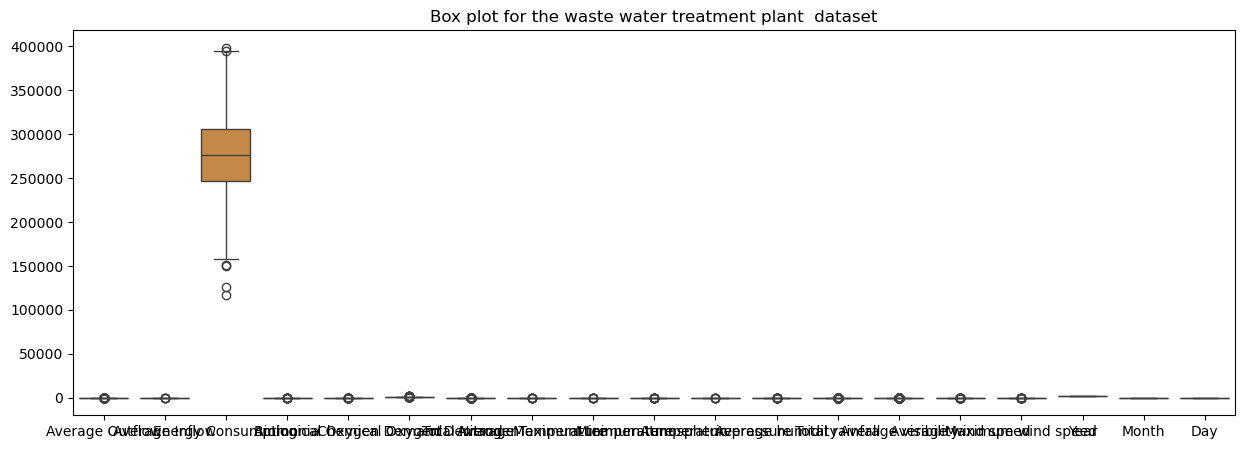

In [8]:
# detecting outliers in our dataset 
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_transformed)
plt.title("Box plot for the waste water treatment plant  dataset")
plt.show()

In [9]:
# since all the columns in our dataset are numeric we will handle the
# outliers based on the inter quantile range 
Q1 = df_transformed.quantile(0.25)
Q3 = df_transformed.quantile(0.75)

# Inter quantile range
IQR = Q3 - Q1

# manipulating the values of the outliers to reduce the dataloss 
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
# print(lower_bound)
# print(upper_bound)

# outliers_filter
outliers_filter = ((df_transformed < lower_bound) | (df_transformed > upper_bound))

num_outliers = outliers_filter.sum().sum()
upper_bound

Average Outflow                  8.771500
Average Inflow                   5.105569
Energy Consumption          483507.750000
Ammonia                         74.000000
Biological Oxygen Demand         4.101808
Chemical Oxygen Demand        1426.250000
Total Nitrogen                  73.276000
Average Temperature             41.900000
Maximum temperature             55.800000
Minimum temperature             31.600000
Atmospheric pressure            -0.060258
Average humidity               131.000000
Total rainfall                  -0.292505
Average visibility               0.980261
Average wind speed              50.000000
Maximum wind speed              86.200000
Year                          2027.000000
Month                           27.000000
Day                             68.000000
dtype: float64

In [10]:
# capping the extreme outliers 
df_capp = df_transformed.copy()
for col in df_transformed.columns:
    df_capp[col] = df_capp[col].clip(lower=lower_bound[col], upper=upper_bound[col])

df_capp.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
count,1382.000000,1.382000e+03,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1.382000e+03,1382.000000,1.382000e+03,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,-4.894621e-15,275159.089001,39.200595,0.001060,845.343575,62.751642,15.036686,20.530897,10.037337,-6.025846e-02,63.558611,-2.925053e-01,0.237217,19.482706,35.381259,2016.258321,6.184515,15.584660
std,1.228778,1.000362e+00,44640.533689,7.643460,0.995547,142.491170,3.201497,5.398491,7.096760,4.656887,5.067226e-16,14.534205,2.332312e-15,0.327767,7.136868,11.626362,1.583491,3.410588,8.741422
min,0.000004,-3.698547e+00,116638.000000,13.000000,-4.057881,360.000000,52.486000,0.000000,0.000000,-2.000000,-6.025846e-02,0.000000,-2.925053e-01,-0.350036,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,3.074500,-7.892040e-01,246435.750000,34.000000,-0.560871,751.250000,61.396000,10.800000,15.000000,6.800000,-6.025846e-02,55.000000,-2.925053e-01,0.220091,14.400000,27.800000,2015.000000,3.000000,8.000000
50%,3.701000,-1.496625e-02,275808.000000,39.000000,-0.144090,845.000000,62.957500,14.300000,19.200000,9.600000,-6.025846e-02,66.000000,-2.925053e-01,0.410134,18.100000,33.500000,2016.000000,6.000000,15.000000
75%,4.498750,6.844892e-01,305703.750000,44.000000,0.604799,920.000000,64.366000,18.575000,25.200000,13.000000,-6.025846e-02,74.000000,-2.925053e-01,0.410134,23.300000,42.400000,2018.000000,9.000000,23.000000
max,7.920000,2.644171e+00,398328.000000,74.000000,3.521701,1426.250000,73.276000,35.500000,43.500000,28.500000,-6.025846e-02,97.000000,-2.925053e-01,0.980261,49.100000,83.500000,2019.000000,12.000000,31.000000


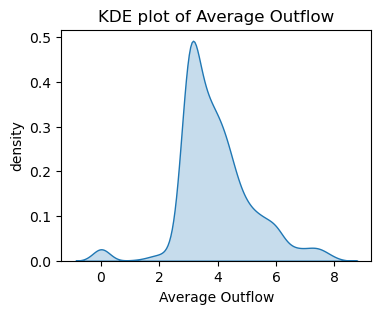

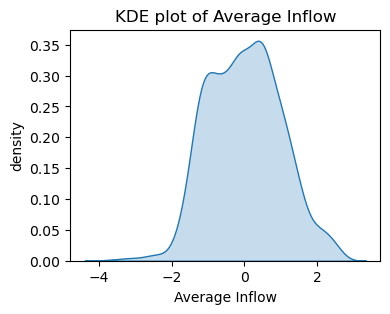

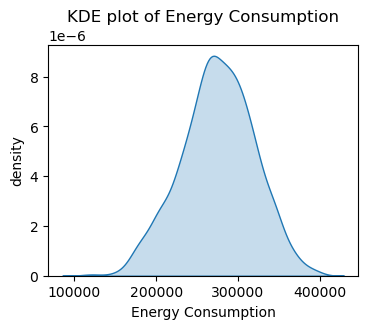

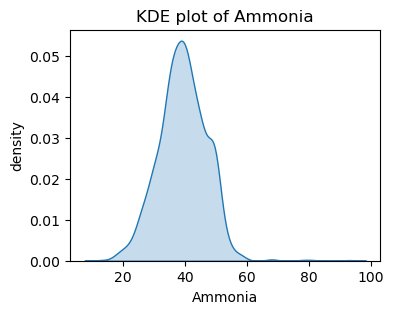

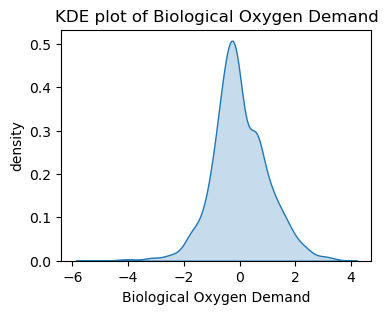

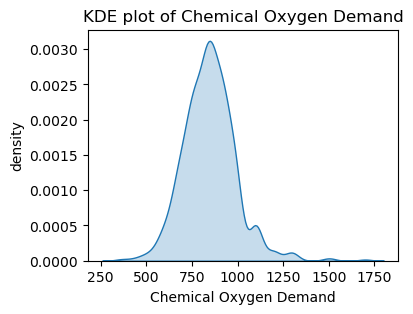

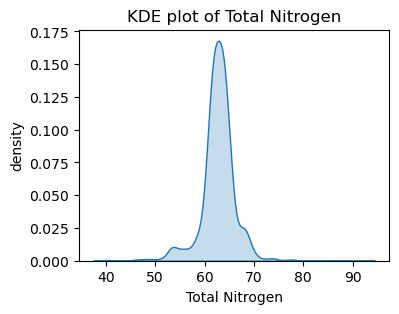

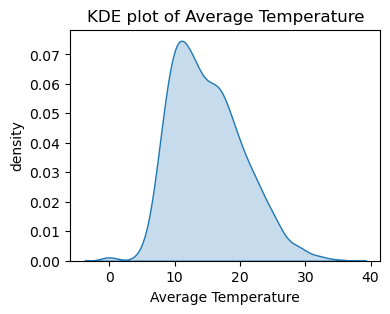

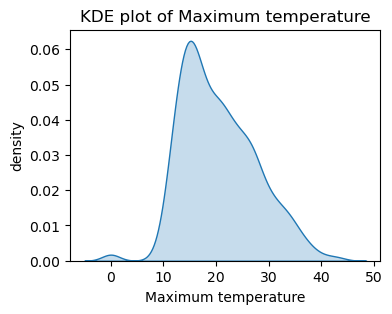

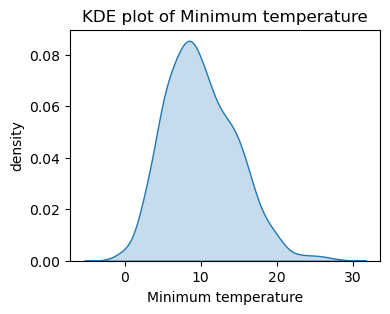

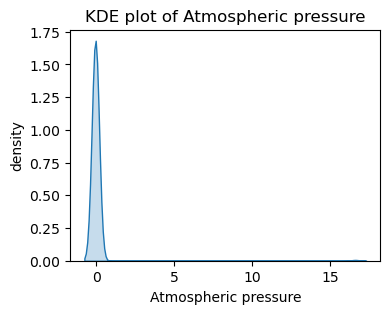

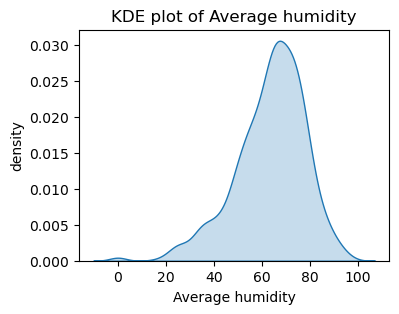

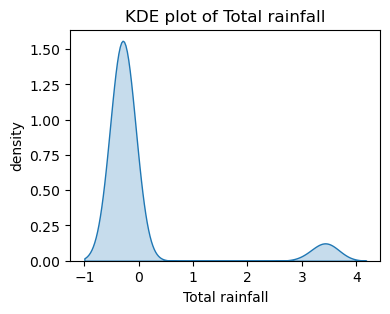

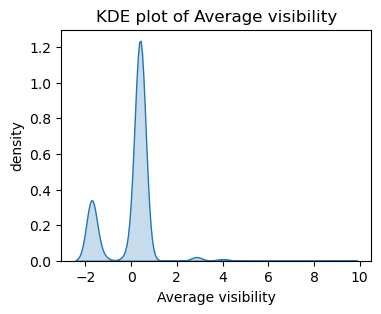

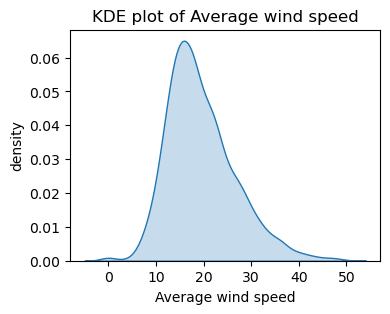

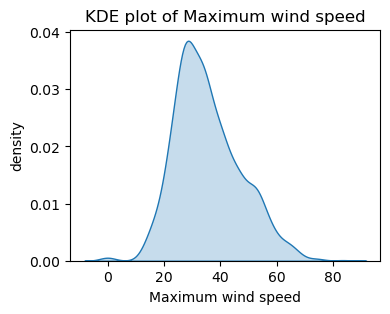

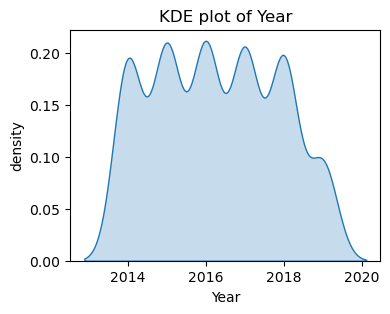

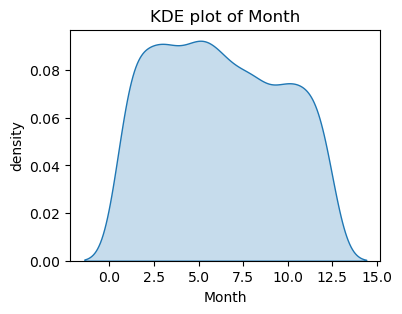

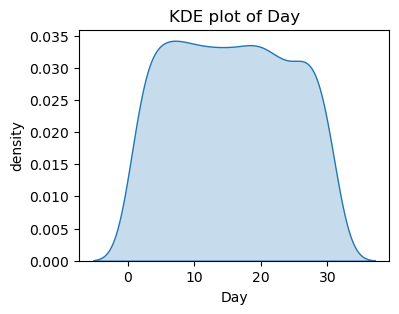

In [11]:
for column in df_capp.columns:
    plt.figure(figsize = (4,3))
    sns.kdeplot(df[column], fill=True)
    plt.title(f'KDE plot of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('density')
    plt.show()

In [12]:
# since the different columns are in different units as well as differ in scale as well we need to do feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_capp)
df_scaled = pd.DataFrame(df_scaled, columns = df_capp.columns)
df_scaled.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
count,1.382000e+03,1.382000e+03,1.382000e+03,1.382000e+03,1.382000e+03,1.382000e+03,1.382000e+03,1.382000e+03,1.382000e+03,1.382000e+03,1382.0,1.382000e+03,1382.0,1.382000e+03,1.382000e+03,1.382000e+03,1.382000e+03,1382.000000,1.382000e+03
mean,1.439595e-16,4.113127e-17,-3.701815e-16,-5.552722e-16,2.056564e-17,4.935753e-16,9.768677e-16,-8.740395e-17,-2.904896e-16,-1.953735e-16,0.0,2.365048e-16,0.0,-1.542423e-16,-1.516716e-16,8.033452e-17,-2.706438e-14,0.000000,-2.313634e-17
std,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,0.0,1.000362e+00,0.0,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362,1.000362e+00
min,-3.199948e+00,-3.698547e+00,-3.552343e+00,-3.429086e+00,-4.078570e+00,-3.407364e+00,-3.207674e+00,-2.786358e+00,-2.894043e+00,-2.585782e+00,0.0,-4.374620e+00,0.0,-1.792326e+00,-2.730856e+00,-3.044294e+00,-1.426683e+00,-1.520674,-1.669058e+00
25%,-6.969669e-01,-7.892040e-01,-6.436692e-01,-6.806443e-01,-5.646488e-01,-6.605857e-01,-4.235932e-01,-7.850749e-01,-7.796374e-01,-6.954235e-01,0.0,-5.890731e-01,0.0,-5.226787e-02,-7.124338e-01,-6.523109e-01,-7.949378e-01,-0.934052,-8.679830e-01
50%,-1.869263e-01,-1.496625e-02,1.454162e-02,-2.625348e-02,-1.458517e-01,-2.412072e-03,6.432387e-02,-1.365109e-01,-1.876038e-01,-9.394591e-02,0.0,1.680362e-01,0.0,5.277514e-01,-1.938115e-01,-1.618683e-01,-1.631931e-01,-0.054120,-6.690806e-02
75%,4.625307e-01,6.844892e-01,6.844837e-01,6.281374e-01,6.066584e-01,5.241269e-01,5.044336e-01,6.556638e-01,6.581585e-01,6.364198e-01,0.0,7.186612e-01,0.0,5.277514e-01,5.350632e-01,6.039105e-01,1.100296e+00,0.825812,8.486062e-01
max,3.247808e+00,2.644171e+00,2.760126e+00,4.554482e+00,3.537667e+00,4.078265e+00,3.288514e+00,3.791934e+00,3.237733e+00,3.966028e+00,0.0,2.301708e+00,0.0,2.267809e+00,4.151403e+00,4.140260e+00,1.732041e+00,1.705744,1.764120e+00


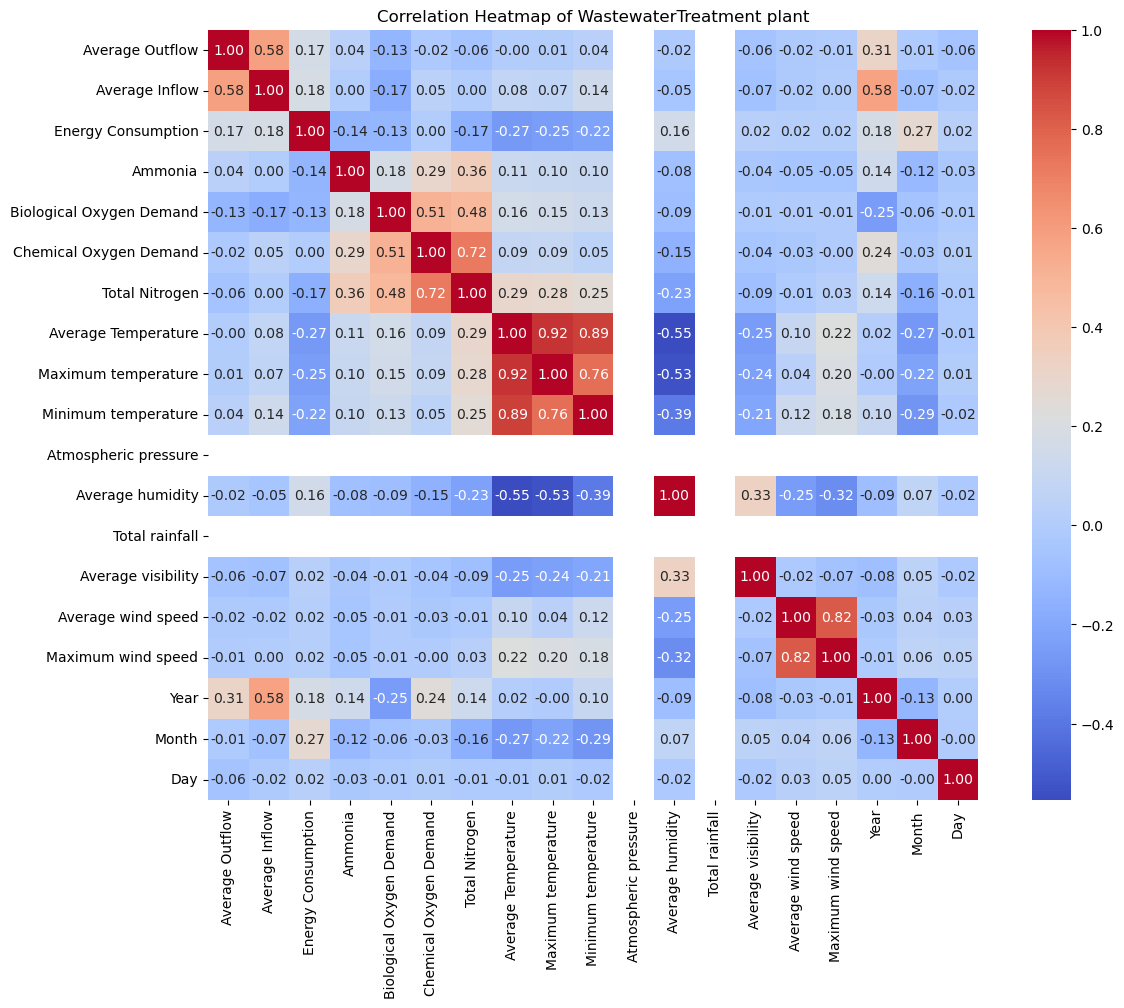

In [15]:
correlation_matrix = df_scaled.corr()
# correlation_matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt='.2f', cbar=True, square=True)
plt.title("Correlation Heatmap of WastewaterTreatment plant")
plt.show()

In [16]:
#general featureSelection
threshold = 0.8
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("Features to drop because of high correlation in correlation_matrix:", correlated_features)


Features to drop because of high correlation in correlation_matrix: {'Minimum temperature', 'Maximum temperature', 'Maximum wind speed'}


In [17]:
df_chosen = df_scaled.drop(columns = correlated_features)
df_chosen.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Year,Month,Day
count,1.382000e+03,1.382000e+03,1.382000e+03,1.382000e+03,1.382000e+03,1.382000e+03,1.382000e+03,1.382000e+03,1382.0,1.382000e+03,1382.0,1.382000e+03,1.382000e+03,1.382000e+03,1382.000000,1.382000e+03
mean,1.439595e-16,4.113127e-17,-3.701815e-16,-5.552722e-16,2.056564e-17,4.935753e-16,9.768677e-16,-8.740395e-17,0.0,2.365048e-16,0.0,-1.542423e-16,-1.516716e-16,-2.706438e-14,0.000000,-2.313634e-17
std,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,0.0,1.000362e+00,0.0,1.000362e+00,1.000362e+00,1.000362e+00,1.000362,1.000362e+00
min,-3.199948e+00,-3.698547e+00,-3.552343e+00,-3.429086e+00,-4.078570e+00,-3.407364e+00,-3.207674e+00,-2.786358e+00,0.0,-4.374620e+00,0.0,-1.792326e+00,-2.730856e+00,-1.426683e+00,-1.520674,-1.669058e+00
25%,-6.969669e-01,-7.892040e-01,-6.436692e-01,-6.806443e-01,-5.646488e-01,-6.605857e-01,-4.235932e-01,-7.850749e-01,0.0,-5.890731e-01,0.0,-5.226787e-02,-7.124338e-01,-7.949378e-01,-0.934052,-8.679830e-01
50%,-1.869263e-01,-1.496625e-02,1.454162e-02,-2.625348e-02,-1.458517e-01,-2.412072e-03,6.432387e-02,-1.365109e-01,0.0,1.680362e-01,0.0,5.277514e-01,-1.938115e-01,-1.631931e-01,-0.054120,-6.690806e-02
75%,4.625307e-01,6.844892e-01,6.844837e-01,6.281374e-01,6.066584e-01,5.241269e-01,5.044336e-01,6.556638e-01,0.0,7.186612e-01,0.0,5.277514e-01,5.350632e-01,1.100296e+00,0.825812,8.486062e-01
max,3.247808e+00,2.644171e+00,2.760126e+00,4.554482e+00,3.537667e+00,4.078265e+00,3.288514e+00,3.791934e+00,0.0,2.301708e+00,0.0,2.267809e+00,4.151403e+00,1.732041e+00,1.705744,1.764120e+00


2. Modeling with Machine Learning Algorithms:

Apply various machine learning algorithms to classify the operational state of the wastewater treatment process. Use the following algorithms:

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_chosen, df_duplicate['Target'], test_size=0.2, random_state=42)


1. Logistic Regression from scratch as well as from sklearn

In [19]:
# from scratch
def sigmoid(z):
    return (1/(1 + np.exp(-z)))

def compute_cost(y, y_hat):
    m = len(y)
    cost = - (1/m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return cost

def gradient_descent(X, y,weights,  bias, learning_rate, iterations):
    # no of datapoints
    m = len(X)
    for i in range(iterations):
        y_hat = sigmoid(np.dot(X, weights) + bias)
        dw = (1/m) * np.dot(X.T, (y_hat - y))
        db = (1/m) * np.sum(y_hat - y)

        weights -= learning_rate*dw
        bias -= learning_rate*db
        
        return weights, bias


def logistic_regression(X, y, learning_rate=0.01, iterations=10000):
    weights = np.zeros(X.shape[1])
    bias = 0
    weights, bias = gradient_descent(X, y, weights, bias, learning_rate, iterations)
    
    return weights, bias

In [20]:
weights, bias = logistic_regression(X_train, y_train)
print(weights, bias)

[ 5.84198018e-04  1.83032236e-04 -6.02277627e-04 -1.49913574e-03
 -6.56939500e-04 -1.30981605e-03 -9.59535666e-04  1.06555665e-04
  0.00000000e+00  4.69953562e-05  0.00000000e+00 -8.25692429e-05
 -1.21736681e-04 -3.58986757e-04  7.50980657e-05  1.32601367e-04] -0.002809954751131222


In [21]:
def predict(weights, bias, X):
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    return np.where(predictions >= 0.5, 1, 0)


y_pred = predict(weights, bias, X_test)
y_pred_logscr = pd.DataFrame(y_pred, columns=['Target'])


In [22]:
# logistic_regression from sklearn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_log = pd.DataFrame(y_pred, columns=['Target'])
y_pred_log.describe()

,Target
count,277.000000
mean,0.144404
std,0.352135
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [23]:
# K-Nearest Neighbours (KNN) - implementation

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) 

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_Knn = pd.DataFrame(y_pred, columns=['Target'])
y_pred_Knn.describe()

,Target
count,277.000000
mean,0.252708
std,0.435351
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
y_pred_dc = pd.DataFrame(y_pred, columns=['Target'])
y_pred_dc.describe()

,Target
count,277.000000
mean,0.227437
std,0.419936
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [26]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)
y_pred_rf = pd.DataFrame(y_pred, columns=['Target'])
y_pred_rf.describe()

,Target
count,277.000000
mean,0.202166
std,0.402342
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [27]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
y_pred_svm = pd.DataFrame(y_pred, columns=['Target'])
y_pred_svm.describe()

,Target
count,277.000000
mean,0.162455
std,0.369535
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [28]:
from sklearn.naive_bayes import GaussianNB
# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = nb_model.predict(X_test)
y_pred_nb = pd.DataFrame(y_pred, columns=['Target'])
y_pred_nb.describe()

,Target
count,277.000000
mean,0.220217
std,0.415143
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Evaluate and compare models using accuracy, F1-score, and confusion matrix, and perform hyperparameter tuning to optimize performance on the test dataset.

In [30]:
from sklearn.metrics import accuracy_score
accuracy_logscr = accuracy_score(y_pred_logscr, y_test)
accuracy_log = accuracy_score(y_pred_log, y_test)
accuracy_dc = accuracy_score(y_pred_dc, y_test)
accuracy_rf = accuracy_score(y_pred_rf, y_test)
accuracy_svm = accuracy_score(y_pred_svm, y_test)
accuracy_knn = accuracy_score(y_pred_Knn, y_test)
accuracy_nb = accuracy_score(y_pred_nb, y_test)
print(f" accuracy of logsitic_regression manual model is : {accuracy_logscr}")
print(f" accuracy of logsitic_regression model is : {accuracy_log}")
print(f" accuracy of decision tree classifier model is : {accuracy_dc}")
print(f" accuracy of random forest classifier model is : {accuracy_rf}")
print(f" accuracy of svm classifier  model is : {accuracy_svm}")
print(f" accuracy of knn classifier  model is : {accuracy_knn}")
print(f" accuracy of gaussain naive bayes  model is : {accuracy_nb}")


 accuracy of logsitic_regression manual model is : 0.7725631768953068
 accuracy of logsitic_regression model is : 0.779783393501805
 accuracy of decision tree classifier model is : 0.9350180505415162
 accuracy of random forest classifier model is : 0.9314079422382672
 accuracy of svm classifier  model is : 0.855595667870036
 accuracy of knn classifier  model is : 0.8086642599277978
 accuracy of gaussain naive bayes  model is : 0.7833935018050542


In [31]:
from sklearn.metrics import f1_score

# F1 Score for each model
f1_logscr = f1_score(y_test, y_pred_logscr)
f1_log = f1_score(y_test, y_pred_log)
f1_dc = f1_score(y_test, y_pred_dc)
f1_rf = f1_score(y_test, y_pred_rf)
f1_svm = f1_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_Knn)
f1_nb = f1_score(y_test, y_pred_nb)

# Print the F1 Scores
print(f"F1 score of logistic_regression manual model is : {f1_logscr:.4f}")
print(f"F1 score of logistic_regression model is : {f1_log:.4f}")
print(f"F1 score of decision tree classifier model is : {f1_dc:.4f}")
print(f"F1 score of random forest classifier model is : {f1_rf:.4f}")
print(f"F1 score of svm classifier model is : {f1_svm:.4f}")
print(f"F1 score of knn classifier model is : {f1_svm:.4f}")
print(f"F1 score of gaussian naive bayes model is : {f1_nb:.4f}")


F1 score of logistic_regression manual model is : 0.4425
F1 score of logistic_regression model is : 0.4078
F1 score of decision tree classifier model is : 0.8571
F1 score of random forest classifier model is : 0.8403
F1 score of svm classifier model is : 0.6015
F1 score of knn classifier model is : 0.6015
F1 score of gaussian naive bayes model is : 0.5161


In [33]:
from sklearn.metrics import confusion_matrix


cm_logscr = confusion_matrix(y_test, y_pred_logscr)
cm_log = confusion_matrix(y_test, y_pred_log)
cm_dc = confusion_matrix(y_test, y_pred_dc)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_Knn = confusion_matrix(y_test, y_pred_Knn)
cm_nb = confusion_matrix(y_test, y_pred_nb)


print("Confusion Matrix for Logistic Regression (manual model):")
print(cm_logscr)
print("\nConfusion Matrix for Logistic Regression (sklearn model):")
print(cm_log)
print("\nConfusion Matrix for Decision Tree Classifier:")
print(cm_dc)
print("\nConfusion Matrix for Random Forest Classifier:")
print(cm_rf)
print("\nConfusion Matrix for Support Vector Machine:")
print(cm_svm)
print("\nConfusion Matrix for Knn classifier:")
print(cm_Knn)
print("\nConfusion Matrix for Gaussian Naive Bayes:")
print(cm_nb)



Confusion Matrix for Logistic Regression (manual model):
[[189  25]
 [ 38  25]]

Confusion Matrix for Logistic Regression (sklearn model):
[[195  19]
 [ 42  21]]

Confusion Matrix for Decision Tree Classifier:
[[205   9]
 [  9  54]]

Confusion Matrix for Random Forest Classifier:
[[208   6]
 [ 13  50]]

Confusion Matrix for Support Vector Machine:
[[203  11]
 [ 29  34]]

Confusion Matrix for Knn classifier:
[[184  30]
 [ 23  40]]

Confusion Matrix for Gaussian Naive Bayes:
[[185  29]
 [ 31  32]]


In [488]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2', 'none']
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8090497737556561


In [489]:
model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9339366515837104


In [35]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [36]:
model = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Score: 0.8271493212669683


In [37]:
model = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8606334841628959


In [38]:
model = GaussianNB()

# Define the parameter grid (e.g., variance smoothing)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'var_smoothing': 1e-09}
Best Cross-Validation Score: 0.8018099547511313


In [495]:
# end